In [3]:
install.packages("ISLR2")
install.packages("caret")
install.packages("klaR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘R.cache’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’




In [4]:
library(ISLR2)
library(caret)
library(MASS)
library(class)
library(klaR)

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘MASS’


The following object is masked from ‘package:ISLR2’:

    Boston




# 4.13

a

In [14]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

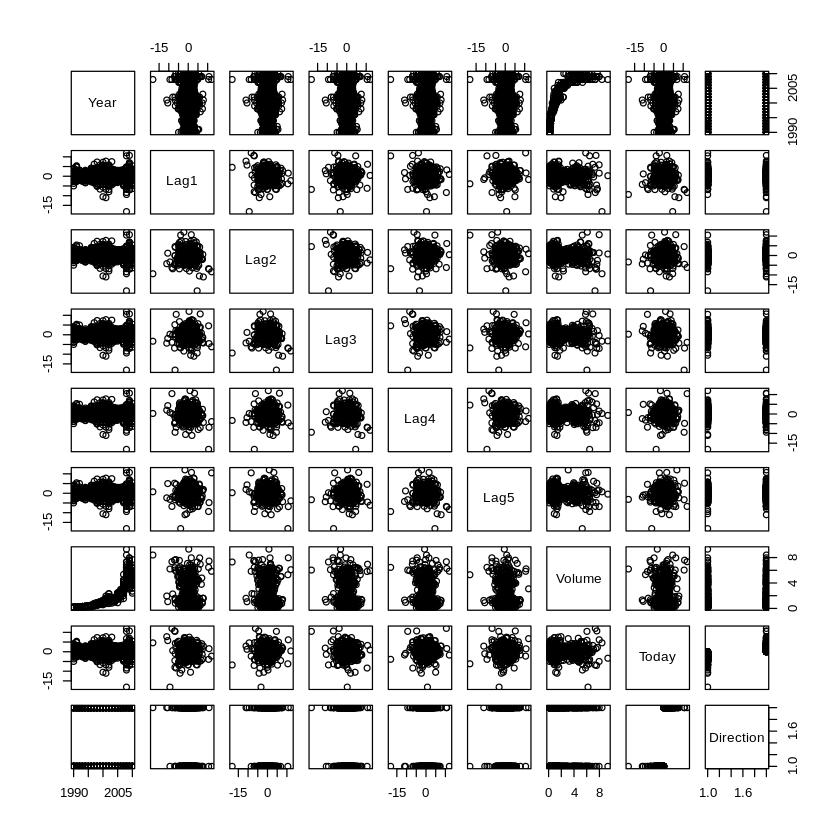

In [15]:
pairs(Weekly)

There is not much pattern observed in the summaries above which is common and expected in stock market datasets. One exception is the pattern between Year and Volume, which shows that the Volume increases over time.

b

In [16]:
glm.fits=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Weekly,family=binomial)
summary(glm.fits)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Lag2 appears to be statistically significant with p-value less than 0.05

c

In [20]:
glm.probs=predict(glm.fits,Weekly,type="response")
glm.pred=rep("Down",length(glm.probs))
glm.pred[glm.probs>.5]="Up"
cm=table(glm.pred,Direction)

cm
mean(glm.pred==Direction)
sensitivity(cm)
specificity(cm)

        Direction
glm.pred Down  Up
    Down   54  48
    Up    430 557

[1] 0.5610652

[1] 0.1115702

[1] 0.9206612

The overall fraction of correct predictions = 0.561065197428834. The model has poor specificity as shown above. In other words, the model could only predict correctly 11% of the time when the Direction is Down.

d

In [22]:
train=Weekly$Year<2009

glm.fits=glm(Direction~Lag2,data=Weekly[train,],family=binomial)
summary(glm.fits)

glm.probs=predict(glm.fits,Weekly[!train,],type="response")
glm.pred=rep("Down",length(glm.probs))
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction[!train])
cm=table(glm.pred,Direction[!train])

cm
mean(glm.pred==Direction[!train])
sensitivity(cm)
specificity(cm)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly[train, 
    ])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


        
glm.pred Down Up
    Down    9  5
    Up     34 56

        
glm.pred Down Up
    Down    9  5
    Up     34 56

[1] 0.625

[1] 0.2093023

[1] 0.9180328

The overall fraction of correct predictions = 0.625

sensitivity = 0.209302325581395

specificity = 0.918032786885246

e

In [34]:
lda.fits=lda(Direction~Lag2,data=Weekly[train,])
lda.fits

lda.pred=predict(lda.fits,Weekly[!train,])
cm=table(lda.pred$class,Direction[!train])

cm
mean(lda.pred$class==Direction[!train])
sensitivity(cm)
specificity(cm)

Call:
lda(Direction ~ Lag2, data = Weekly[train, ])

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

      
       Down Up
  Down    9  5
  Up     34 56

[1] 0.625

[1] 0.2093023

[1] 0.9180328

The overall fraction of correct predictions = 0.625

sensitivity = 0.209302325581395

specificity = 0.918032786885246

f

In [36]:
qda.fits=qda(Direction~Lag2,data=Weekly[train,])
qda.fits

qda.pred=predict(qda.fits,Weekly[!train,])
cm=table(qda.pred$class,Direction[!train])

cm
mean(qda.pred$class==Direction[!train])
sensitivity(cm)
specificity(cm)

Call:
qda(Direction ~ Lag2, data = Weekly[train, ])

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

      
       Down Up
  Down    0  0
  Up     43 61

[1] 0.5865385

[1] 0

[1] 1

The overall fraction of correct predictions = 0.586538461538462

sensitivity = 0

specificity = 1

g

In [46]:
knn.pred=knn(data.frame(Weekly[train,]$Lag2), data.frame(Weekly[!train,]$Lag2), Direction[train], k=1)
cm=table(knn.pred,Direction[!train])

cm
mean(knn.pred==Direction[!train])
sensitivity(cm)
specificity(cm)

        
knn.pred Down Up
    Down   21 30
    Up     22 31

[1] 0.5

[1] 0.4883721

[1] 0.5081967

The overall fraction of correct predictions = 0.5

sensitivity = 0.488372093023256

specificity = 0.508196721311475

h

In [54]:
NaiveBayes.fits <- NaiveBayes(Direction~Lag2,data=Weekly[train,])
NaiveBayes.pred=predict(NaiveBayes.fits,Weekly[!train,])
cm=table(NaiveBayes.pred$class,Direction[!train])

cm
mean(NaiveBayes.pred$class==Direction[!train])
sensitivity(cm)
specificity(cm)

      
       Down Up
  Down    0  0
  Up     43 61

[1] 0.5865385

[1] 0

[1] 1

The overall fraction of correct predictions = 0.586538461538462

sensitivity = 0

specificity = 1

i

Based on the accuracy, logistic regression and LDA achieve the highest score of 0.625

j

In [62]:
glm.fits=glm(Direction~Lag2+Lag1,data=Weekly[train,],family=binomial)
summary(glm.fits)

glm.probs=predict(glm.fits,Weekly[!train,],type="response")
glm.pred=rep("Down",length(glm.probs))
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction[!train])
cm=table(glm.pred,Direction[!train])

cm
mean(glm.pred==Direction[!train])
sensitivity(cm)
specificity(cm)


Call:
glm(formula = Direction ~ Lag2 + Lag1, family = binomial, data = Weekly[train, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6149  -1.2565   0.9989   1.0875   1.5330  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.21109    0.06456   3.269  0.00108 **
Lag2         0.05384    0.02905   1.854  0.06379 . 
Lag1        -0.05421    0.02886  -1.878  0.06034 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1347.0  on 982  degrees of freedom
AIC: 1353

Number of Fisher Scoring iterations: 4


        
glm.pred Down Up
    Down    7  8
    Up     36 53

        
glm.pred Down Up
    Down    7  8
    Up     36 53

[1] 0.5769231

[1] 0.1627907

[1] 0.8688525

In [65]:
lda.fits=lda(Direction~Lag2+I(Lag1^2),data=Weekly[train,])
lda.fits

lda.pred=predict(lda.fits,Weekly[!train,])
cm=table(lda.pred$class,Direction[!train])

cm
mean(lda.pred$class==Direction[!train])
sensitivity(cm)
specificity(cm)

Call:
lda(Direction ~ Lag2 + I(Lag1^2), data = Weekly[train, ])

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2 I(Lag1^2)
Down -0.03568254  4.964397
Up    0.26036581  5.318940

Coefficients of linear discriminants:
                 LD1
Lag2      0.45006708
I(Lag1^2) 0.02767883

      
       Down Up
  Down    8  2
  Up     35 59

[1] 0.6442308

[1] 0.1860465

[1] 0.9672131

In [66]:
qda.fits=qda(Direction~Lag2+I(Lag1^2),data=Weekly[train,])
qda.fits

qda.pred=predict(qda.fits,Weekly[!train,])
cm=table(qda.pred$class,Direction[!train])

cm
mean(qda.pred$class==Direction[!train])
sensitivity(cm)
specificity(cm)

Call:
qda(Direction ~ Lag2 + I(Lag1^2), data = Weekly[train, ])

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2 I(Lag1^2)
Down -0.03568254  4.964397
Up    0.26036581  5.318940

      
       Down Up
  Down   32 40
  Up     11 21

[1] 0.5096154

[1] 0.744186

[1] 0.3442623

In [67]:
knn.pred=knn(data.frame(Weekly[train,]$Lag2), data.frame(Weekly[!train,]$Lag2), Direction[train], k=5)
cm=table(knn.pred,Direction[!train])

cm
mean(knn.pred==Direction[!train])
sensitivity(cm)
specificity(cm)

        
knn.pred Down Up
    Down   15 21
    Up     28 40

[1] 0.5288462

[1] 0.3488372

[1] 0.6557377

In [68]:
knn.pred=knn(data.frame(Weekly[train,]$Lag2), data.frame(Weekly[!train,]$Lag2), Direction[train], k=10)
cm=table(knn.pred,Direction[!train])

cm
mean(knn.pred==Direction[!train])
sensitivity(cm)
specificity(cm)

        
knn.pred Down Up
    Down   16 21
    Up     27 40

[1] 0.5384615

[1] 0.372093

[1] 0.6557377

In [76]:
knn.pred=knn(data.frame(Weekly[train,c('Lag1','Lag2')]), data.frame(Weekly[!train,c('Lag1','Lag2')]), Direction[train], k=1)
cm=table(knn.pred,Direction[!train])

cm
mean(knn.pred==Direction[!train])
sensitivity(cm)
specificity(cm)

        
knn.pred Down Up
    Down   18 29
    Up     25 32

[1] 0.4807692

[1] 0.4186047

[1] 0.5245902

Out of all experiments in j, the best accuracy is achieved using lda with score of 0.644230769230769. The variables and confusion matrix are shown above.

# 4.14

a

In [9]:
mpg01 <- rep(0, nrow(Auto))
mpg01[Auto$mpg > median(Auto$mpg)] <- 1
mpg01 <- as.factor(mpg01)
Auto <- data.frame(Auto, mpg01)

summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

b

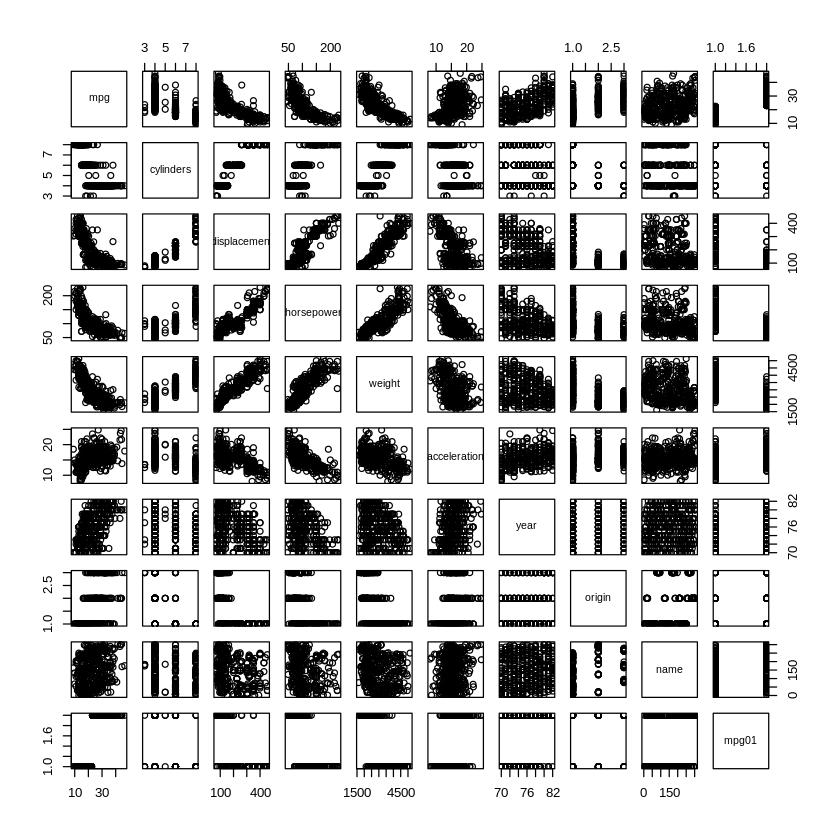

In [10]:
pairs(Auto)

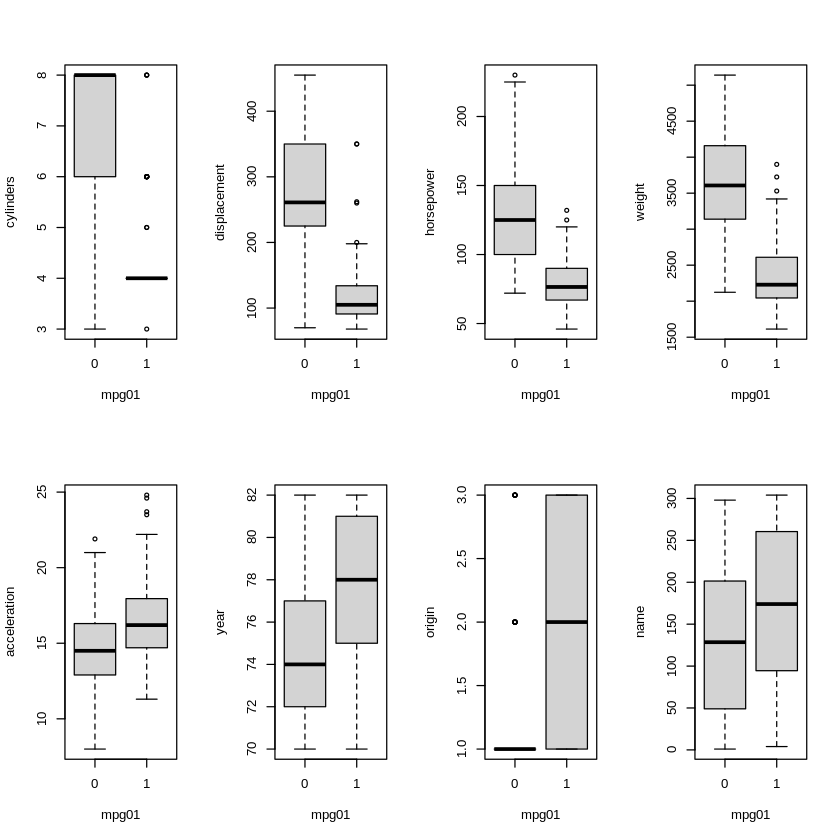

In [18]:
par(mfrow = c(2, 4))
boxplot(cylinders ~ mpg01, data = Auto)
boxplot(displacement ~ mpg01, data = Auto)
boxplot(horsepower ~ mpg01, data = Auto)
boxplot(weight ~ mpg01, data = Auto)
boxplot(acceleration ~ mpg01, data = Auto)
boxplot(year ~ mpg01, data = Auto)
boxplot(origin ~ mpg01, data = Auto)
boxplot(name ~ mpg01, data = Auto)

cylinders, displacement, horsepower, and weight seem most likely to be useful in predicting mpg01

c

In [21]:
inTrain = createDataPartition(y=Auto$mpg01, p=0.5, list=FALSE)  
train = Auto[inTrain,]
test = Auto[-inTrain,]

nrow(Auto)
nrow(train)
nrow(test)

[1] 392

[1] 196

[1] 196

d

In [28]:
lda.fits=lda(mpg01~cylinders + displacement + horsepower + weight,data=train)
lda.pred=predict(lda.fits,test)
mean(lda.pred$class!=test$mpg01)

[1] 0.1122449

test error of the model obtained = 0.112244897959184

e

In [29]:
qda.fits=qda(mpg01~cylinders + displacement + horsepower + weight,data=train)
qda.pred=predict(qda.fits,test)
mean(qda.pred$class!=test$mpg01)

[1] 0.122449

test error of the model obtained = 0.122448979591837

f

In [31]:
glm.fits=glm(mpg01~cylinders + displacement + horsepower + weight,data=train,family=binomial)
glm.probs=predict(glm.fits,test,type="response")
glm.pred=rep(0,length(glm.probs))
glm.pred[glm.probs>.5]=1
mean(glm.pred!=test$mpg01)

[1] 0.1122449

test error of the model obtained = 0.112244897959184

g

In [42]:
NaiveBayes.fits <- NaiveBayes(mpg01~cylinders + displacement + horsepower + weight,data=train)
NaiveBayes.pred=predict(NaiveBayes.fits,test)
mean(NaiveBayes.pred$class!=test$mpg01)

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 11”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 14”
Warning message in

[1] 0.1122449

test error of the model obtained = 0.112244897959184

h

In [47]:
knn.pred=knn(train[,c("cylinders","displacement","horsepower","weight")], test[,c("cylinders","displacement","horsepower","weight")], train$mpg01, k=1)
mean(knn.pred!=test$mpg01)

[1] 0.1326531

In [48]:
knn.pred=knn(train[,c("cylinders","displacement","horsepower","weight")], test[,c("cylinders","displacement","horsepower","weight")], train$mpg01, k=3)
mean(knn.pred!=test$mpg01)

[1] 0.122449

In [50]:
knn.pred=knn(train[,c("cylinders","displacement","horsepower","weight")], test[,c("cylinders","displacement","horsepower","weight")], train$mpg01, k=5)
mean(knn.pred!=test$mpg01)

[1] 0.1326531

In [46]:
knn.pred=knn(train[,c("cylinders","displacement","horsepower","weight")], test[,c("cylinders","displacement","horsepower","weight")], train$mpg01, k=10)
mean(knn.pred!=test$mpg01)

[1] 0.1377551

test error of the model obtained = 0.13265306122449, 0.122448979591837, 0.13265306122449, 0.137755102040816 for k = 1,3,5,10 respectively. By experiment above, knn performs best when k = 3.

# 5.2

d

In [6]:
n = 5

p_j_in_sample <- function(n) {
    return(1 - (1 - 1/n) ^ n)
}

p_j_in_sample(n)

[1] 0.67232

e

In [7]:
n = 100

p_j_in_sample(n)

[1] 0.6339677

f

In [8]:
n = 10000

p_j_in_sample(n)

[1] 0.632139

g

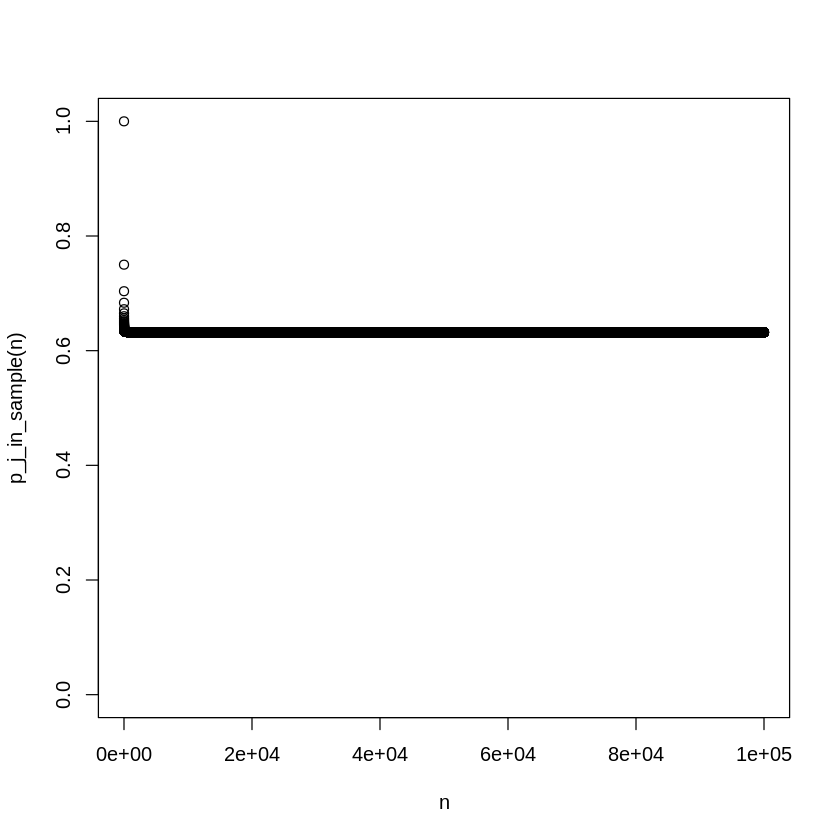

In [12]:
n = 1:100000
plot(n, p_j_in_sample(n), ylim = c(0,1))

The plot above shows that the probability that the jth observation is in the bootstrap sample remains around 0.632 as n goes to large values, i.e. lim n->inf 1-(1-1/n)^n = 1-1/e = 0.632.

h

In [15]:
store <- rep(NA, 10000)
for(i in 1:10000){
    store[i] <- sum(sample(1:100, rep=TRUE) == 4) > 0 
}
mean(store)

[1] 0.6317

In this experiment, we estimates the probability of a bootstrap sample of size n = 100 contains the jth observation. It is found that the value is around the probability found in Q2e and the plot.

# 5.5

# 5.6